# Title: Cloud Instances Recommender for NB w RFC Balanced Class Application

# Load library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import math
from statistics import mean 
import statistics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.utils import shuffle

%matplotlib inline

# Read Dataset 

In [2]:
# dataset 
df = pd.read_csv("dataset_balanced_AI.csv")
# QODE verification dataset 
df_veri = pd.read_csv("dataset_balanced_runtime_QODE 2.csv")

df

,Rating,Cost(per hour USD),Instance
0,3.666667,0.0928,t2.large
1,2.000000,0.0832,B2ms
2,3.333333,0.0950,N1s2
3,3.333333,0.0150,Lin.G
4,2.666667,0.1000,c4.large
...,...,...,...
75,3.000000,0.0230,t2.small
76,4.000000,0.0752,t3a.large
77,4.000000,0.0376,t3a.medium
78,4.000000,0.0188,t3a.small


In [3]:
# Traing and Testing set length
length=df.shape
len_train=round(length[0]*0.8)  # 80% of total dataset 
len_test=length[0]-len_train
len_train

64

In [4]:
# Shuffel dataset 
df = shuffle(df)
df = shuffle(df)

df=df.append(df_veri)# add verification: Kmeans and plot purposes 

# Data Visualization 

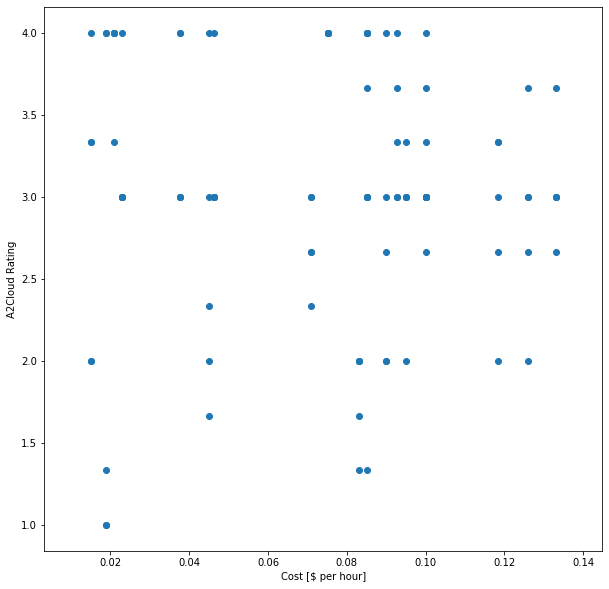

In [5]:
fig = plt.figure(figsize=(10, 10))

plt.scatter(df.iloc[:,1:2],df.iloc[:,0:1],  marker='o')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Rating')
plt.show()

# K Means 

In [6]:
X=df.iloc[:,0:2]
model = KMeans(n_clusters = 4)
kmeans=model.fit(X)
labels = kmeans.labels_ # creating classification columns for supervised learning 
labels

array([1, 0, 1, 0, 0, 0, 3, 0, 2, 1, 1, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 3,
       2, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2,
       0, 2, 1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0], dtype=int32)

In [7]:
df['cluster']=labels
df11=df.iloc[0:80,:]
df11

,Rating,Cost(per hour USD),Instance,cluster
69,2.000000,0.1260,E2s,1
15,3.000000,0.0230,t2.small,0
50,2.000000,0.1184,N1M2,1
13,3.000000,0.1000,m4.large,0
10,3.333333,0.1184,N1M2,0
...,...,...,...,...
32,4.000000,0.0850,c5.large,2
19,4.000000,0.0208,t3.small,2
23,2.000000,0.0150,Lin.G,1
74,3.000000,0.0464,t2.medium,0


# Cluster Visualization 

Text(0, 0.5, 'A2Cloud Score')

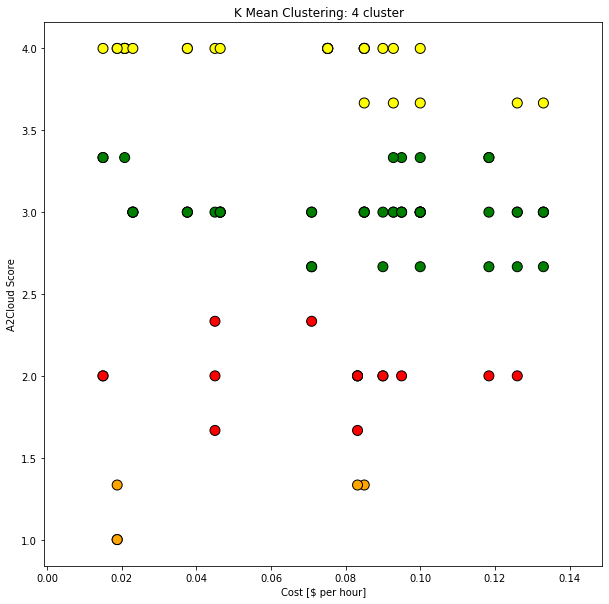

In [8]:
fig = plt.figure(figsize=(10, 10))
 # Create a colormap
colormap = np.array(['green', 'red','yellow','orange'])
plt.scatter(df.iloc[:,1:2], df.iloc[:,0:1], c=colormap[model.labels_], edgecolor = 'black', s = 100)
plt.title('K Mean Clustering: 4 cluster  ')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Score')

### Cluster Number conversion: 4-excellent, 3-good, 2-avg, 1- bad

In [9]:
df.tail(20)

,Rating,Cost(per hour USD),Instance,cluster
0,3.333333,0.0928,t2.large,0
1,1.333333,0.0832,B2ms,3
2,3.000000,0.0950,N1s2,0
3,3.333333,0.0150,Lin.G,0
4,3.333333,0.1000,c4.large,0
5,3.000000,0.0850,F2s,0
6,2.666667,0.0709,N1cc,0
7,2.333333,0.0450,Lin.C,1
8,2.666667,0.1330,r4.large,0
9,2.666667,0.1260,E2s,0


In [10]:
#dataset save as csv file
df.to_csv(r'dataset_new.csv',index=False)
df_new = pd.read_csv("dataset_new.csv")
df1=df_new

# check cluster label and set manually to each run
df_new=df_new.replace({'cluster':0},7)
df_new=df_new.replace({'cluster':1},6)
df_new=df_new.replace({'cluster':2},8)
df_new=df_new.replace({'cluster':3},5)

df_new=df_new.replace({'cluster':5},1)
df_new=df_new.replace({'cluster':6},2)
df_new=df_new.replace({'cluster':7},3)
df_new=df_new.replace({'cluster':8},4)

In [11]:
df_new.head(10)

,Rating,Cost(per hour USD),Instance,cluster
0,2.000000,0.1260,E2s,2
1,3.000000,0.0230,t2.small,3
2,2.000000,0.1184,N1M2,2
3,3.000000,0.1000,m4.large,3
4,3.333333,0.1184,N1M2,3
5,3.000000,0.0850,F2s,3
6,1.333333,0.0850,F2s,1
7,3.000000,0.0850,F2s,3
8,4.000000,0.0900,Lin.M,4
9,2.000000,0.0450,Lin.C,2


In [12]:
df=df_new

# Training 

In [13]:
xtrain=df[['Rating','Cost(per hour USD)']]
#xtrain=xtrain[0:len_train]
xtrain=xtrain[16:80]
ytrain=df['cluster'].values.tolist()
ytrain=ytrain[16:80]

In [14]:
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

# Testing 

In [28]:
xtest=df[['Rating','Cost(per hour USD)']]
#xtest=xtest[len_train:80]
xtest=xtest[0:16]

b=df['cluster'].values.tolist()
#y_actual=b[len_train:80]
y_actual=b[0:16]

In [29]:
y_pred = classifier.predict(xtest)
y_pred

array([2, 3, 2, 3, 3, 3, 2, 3, 4, 2, 2, 4, 3, 3, 3, 4])

In [30]:
print('Model Accuracy is',100*accuracy_score(y_pred,y_actual),'%')


Model Accuracy is 93.75 %


In [31]:
print(confusion_matrix(y_pred, y_actual))


[[0 0 0 0]
 [1 4 0 0]
 [0 0 8 0]
 [0 0 0 3]]


# Plot confusion matrix 

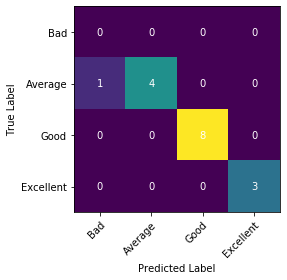

In [32]:
a_label = ["Bad","Average","Good","Excellent"]
p_label = ["Bad","Average","Good","Excellent"]
cm=confusion_matrix(y_pred, y_actual)

fig, ax = plt.subplots()
im = ax.imshow(cm)

# We want to show all ticks...
ax.set_xticks(np.arange(len(a_label)))
ax.set_yticks(np.arange(len(p_label)))
# ... and label them with the respective list entries
ax.set_xticklabels(a_label)
ax.set_yticklabels(a_label)
ax.set_ylim(len(cm)-0.5, -0.5)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(a_label)):
    for j in range(len(p_label)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_xlabel("Predicted Label")        
ax.set_ylabel("True Label")        

fig.tight_layout()
plt.show()

In [33]:
print(classification_report(y_actual, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.70      0.75      0.72        16
weighted avg       0.89      0.94      0.91        16



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# QODE VERIFICATION

In [20]:
# read verififcation dataset 
x_qode=df_veri[['Rating','Cost(per hour USD)']]

# make predictions 
y_pred = classifier.predict(x_qode)

y_actual=b[80:100]

In [21]:
print('Model Accuracy is',100*accuracy_score(y_pred,y_actual),'%')


Model Accuracy is 95.0 %


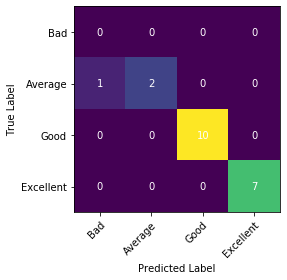

In [22]:
a_label = ["Bad","Average","Good","Excellent"]
p_label = ["Bad","Average","Good","Excellent"]
cm=confusion_matrix(y_pred, y_actual)

fig, ax = plt.subplots()
im = ax.imshow(cm)

# We want to show all ticks...
ax.set_xticks(np.arange(len(a_label)))
ax.set_yticks(np.arange(len(p_label)))
# ... and label them with the respective list entries
ax.set_xticklabels(a_label)
ax.set_yticklabels(a_label)
ax.set_ylim(len(cm)-0.5, -0.5)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(a_label)):
    for j in range(len(p_label)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_xlabel("Predicted Label")        
ax.set_ylabel("True Label")        

fig.tight_layout()
plt.show()

In [27]:
print(classification_report(y_actual, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         7

    accuracy                           0.95        20
   macro avg       0.67      0.75      0.70        20
weighted avg       0.92      0.95      0.93        20



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Get Instance Suggestion for New application: Input=[A2Cloud_score, cost_per_hour]

In [ ]:
# Input from user 

rating = float(input(' Rating (1 to 4): '))
cost = float(input('Cost of instance (per hour): '))

# prediction function implementation
def Prediction(rating,cost):
    y_pred = classifier.predict((np.array([rating,cost])).reshape(1, -1))[0]
    return y_pred
    
# prediction function call 
guess_cluster=Prediction(rating,cost) 

#slice dataset based on the predicited cluster 
training=df[0:len_train]
training=training[training['cluster']==guess_cluster]

### Mulitple Instance Recommendation 


In [ ]:
# calculate unique instances name in the predicted cluster 
instance=training['Instance'].unique()
print("The Recommended Instances are: ",instance)

### Single Instance Recommendation

In [ ]:
instance_single=training.sort_values(by=['Rating', 'Cost(per hour USD)'])
instance_single=instance_single.iloc[0:1,:]
#z.iloc[0,0:1][0],(z.iloc[0,1:2])[0],(z.iloc[0,2:3])[0]
print("Instance recommendation for your App: ",instance_single.iloc[0,2:3][0] )